In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lending-club-loan-data/loan.csv')

/Users/shivee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_subset=df.sample(frac=0.7, replace=False, random_state=1)

In [4]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


/Users/shivee/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Amount Funded by the Lender (USD)')

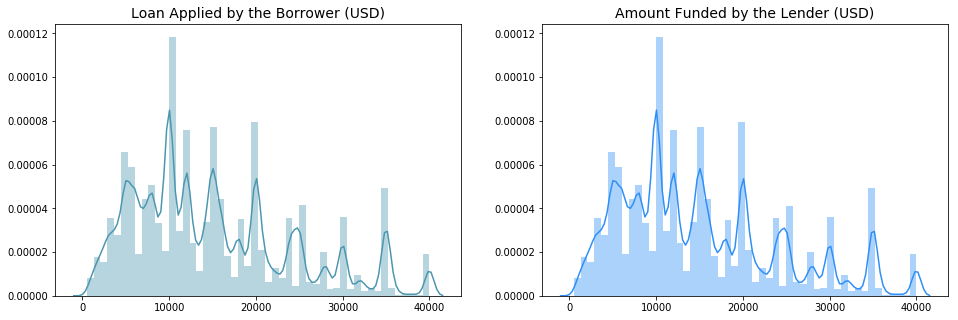

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

loan_amount = df.loan_amnt.values
funded_amount = df.funded_amnt.values

sns.distplot(loan_amount, ax=ax[0], color="#4C96AF")
ax[0].set_title("Loan Applied by the Borrower (USD)", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2F8FF7")
ax[1].set_title("Amount Funded by the Lender (USD)", fontsize=14)

Distribution of annual income of people who borrowed from LC.

In [7]:
df_subset.annual_inc.fillna(value=df_subset.annual_inc.median(),inplace=True)
df_subset.loc[df_subset['annual_inc'] > 270000.0, 'annual_inc'] = 270000.0

Text(0.5, 1.0, 'Distribution of annual income of borrowers')

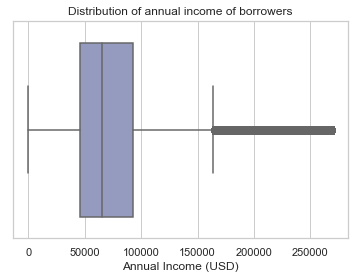

In [73]:
ax=sns.boxplot(x=df_subset.annual_inc,palette='BuPu_r')
plt.xlabel('Annual Income (USD)', fontsize=12)
plt.title('Distribution of annual income of borrowers')

In [9]:
df_subset['issue_d']=pd.to_datetime(df_subset['issue_d'])

In [10]:
df_subset['year']=df_subset.issue_d.dt.year

Text(0, 0.5, 'Average Interest Rate of Loans')

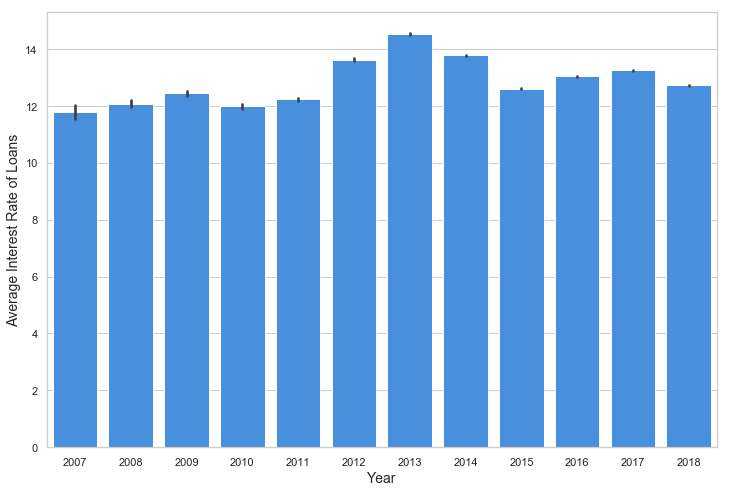

In [16]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=df_subset.year, y=df.int_rate, color="#2F8FF7")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Interest Rate of Loans', fontsize=14)

In [46]:
temp1=df_subset.groupby(by='year')['loan_amnt'].agg('sum').reset_index()

In [59]:
temp1.tail()

,year,loan_amnt
7,2014,2452843575
8,2015,4497966575
9,2016,4485117225
10,2017,4609985700
11,2018,5562814775


[(20000000, 6000000000)]

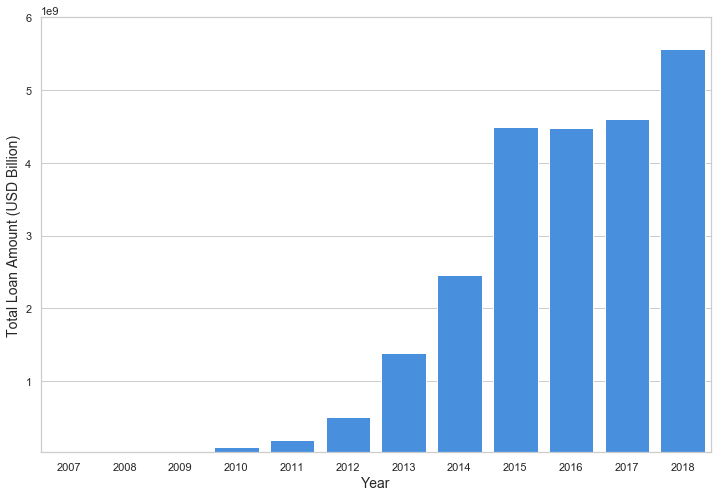

In [282]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=temp1.year, y=temp1.loan_amnt, color="#2F8FF7",data=temp1)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Loan Amount (USD Billion)', fontsize=14)
ax.set(ylim=(2*10**7,6*10**9))

In [ ]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=df_s.year, y=df.loan_amnt,color="#2F8FF7")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Loan Amount', fontsize=14)

Text(0, 0.5, 'Annual Income (USD)')

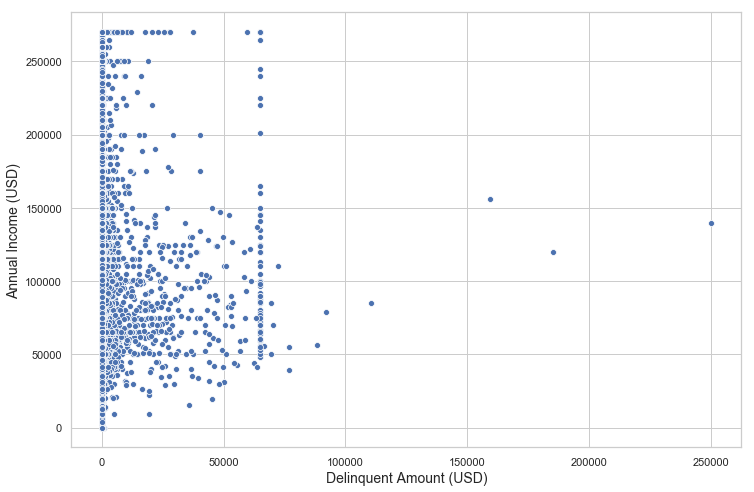

In [76]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
sns.scatterplot(x=df_subset.delinq_amnt, y=df_subset.annual_inc)
plt.xlabel('Delinquent Amount (USD)', fontsize=14)
plt.ylabel('Annual Income (USD)', fontsize=14)

In [152]:
pur=['educational']
grd=['A','B','C']

In [153]:
temp2=df_subset[df_subset.purpose.isin(pur) & df_subset.grade.isin(grd)]

Text(0, 0.5, 'Interest Rate')

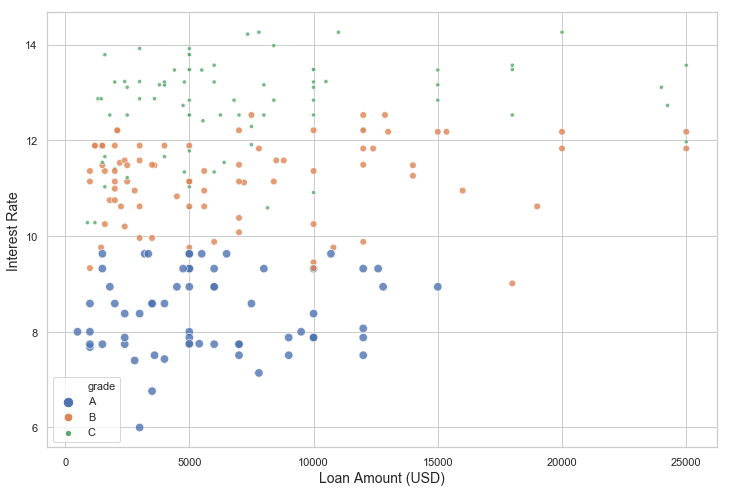

In [159]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
sns.scatterplot(size=temp2.grade,hue=temp2.grade, y=temp2.int_rate,x=temp2.loan_amnt, alpha=0.8, hue_order=['A','B','C'], size_order=['A','B','C'])
plt.xlabel('Loan Amount (USD)', fontsize=14)
plt.ylabel('Interest Rate', fontsize=14)

[]

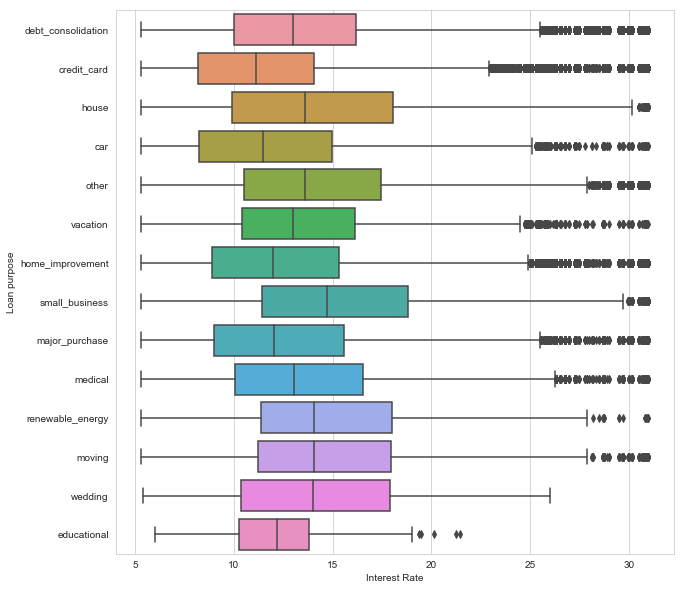

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x=df.int_rate, y=df.purpose,ax=ax)
ax.set(xlabel='Interest Rate', ylabel='Loan purpose')
ax.plot(label='big')

In [167]:
pur=['car','home','educational','vacation','wedding']
temp3=df_subset[df_subset.purpose.isin(pur)]

Text(0.5, 1.0, 'Average Interest Rate by Purpose')

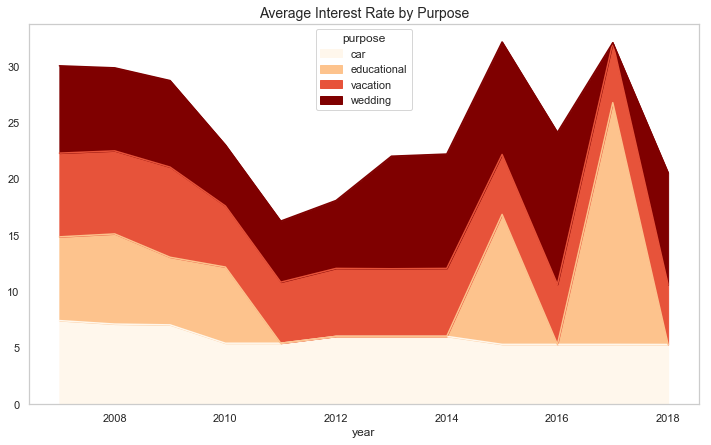

In [183]:

f, ax1 = plt.subplots(1)
by_interest_rate = temp3.groupby(['year', 'purpose']).int_rate.min()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap='OrRd', grid=False, ax=ax1, figsize=(12,7))
ax1.set_title('Average Interest Rate by Purpose', fontsize=14)

In [258]:
inc=['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
df_state=df_subset[df_subset['addr_state'].isin(inc)]

In [185]:
cm = sns.light_palette("lightblue", as_cmap=True)
pd.crosstab(df_state['emp_length'], df_state['purpose']).style.background_gradient(cmap = cm)

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
emp_length,,,,,,,,,,,,,,
1 year,305,6315,13999,11,944,142,586,291,254,1480,16,333,162,37
10+ years,1105,24143,67741,3,8057,593,2089,1372,570,7311,86,1288,1102,72
2 years,384,8037,18723,10,1437,200,839,415,311,2002,21,468,259,43
3 years,342,7078,16303,6,1358,171,693,336,231,1800,27,447,212,41
4 years,274,4852,12420,8,1072,108,506,265,185,1245,19,308,188,40
5 years,281,5174,12858,8,1185,131,541,268,179,1423,10,286,204,40
6 years,204,3807,9504,3,934,98,372,191,112,1002,17,217,153,36
7 years,156,3372,8750,2,851,67,318,176,80,861,19,203,118,12
8 years,136,3205,8883,0,847,91,300,207,106,856,17,196,107,13


In [ ]:
cm = sns.light_palette("lightblue", as_cmap=True)
pd.crosstab(df_state['loan_status'], df_state['purpose']).style.background_gradient(cmap = cm)

In [273]:
temp4=df_state.groupby(by=['grade','purpose'])['int_rate'].mean().reset_index()

In [274]:
temp4.head()

,grade,purpose,int_rate
0,A,car,7.067281
1,A,credit_card,7.037931
2,A,debt_consolidation,7.156725
3,A,educational,8.512222
4,A,home_improvement,6.942902


In [278]:
result = temp4.pivot(index='grade', columns='purpose', values='int_rate')

In [279]:
result.head()

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
grade,,,,,,,,,,,,,,
A,7.067281,7.037931,7.156725,8.512222,6.942902,7.020027,6.988719,7.095929,7.135282,7.093776,7.172979,7.110296,7.112321,7.523378
B,10.617875,10.622023,10.740514,11.163333,10.572576,10.730245,10.617123,10.666831,10.771964,10.681700,10.790175,10.868751,10.766582,11.607368
C,14.126697,14.113528,14.169593,12.822222,14.152275,14.300547,14.131876,14.152221,14.187045,14.144434,14.193151,14.218733,14.042544,14.651013
D,18.266297,18.137412,18.103361,14.766364,18.092385,18.544742,18.207520,18.247406,18.101055,18.337069,18.049020,17.922802,18.315524,17.828261
E,21.467117,21.850549,21.723471,15.395714,21.800028,22.361489,21.988048,22.076212,22.029280,22.166799,20.545714,21.466757,22.023152,20.351944


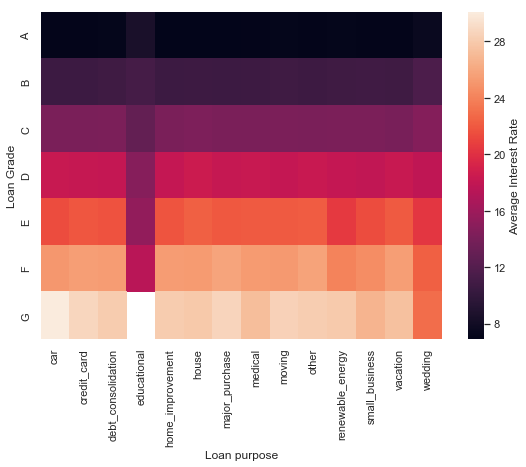

In [280]:
fig, ax = plt.subplots(figsize=(9,6))
ax = sns.heatmap(data=result,)
ax.set(ylabel='Loan Grade', xlabel='Loan purpose')
ax.plot(label='big')
ax.collections[0].colorbar.set_label("Average Interest Rate")